#**STEP 1 : PERKENALAN**

**GRADED CHALLENGE 3**

**BY : MUHAMMAD RIZKI HERFIAN**

**BATCH : 004**

**MATERI : Regression**

**Graded Challenge 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:**

* Mampu memahami konsep Classification dengan Ensemble Model
* Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
* Mampu mengimplementasikan Ensemble Model untuk membuat prediksi


## **STEP 2 : IMPORTING LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import time
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, roc_curve, classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

**Library yang akan digunakan, masing-masing memiliki fungsi sebagai berikut:**

* Pandas adalah sebuah library yang menyediakan struktur data dan analisis data yang mudah digunakan. Pandas biasa digunakan untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya.

* Numpy berfungsi memudahkan operasi komputasi tipe data numerik seperti penjumlahan, pengurangan, perkalian, pangkat, dan operasi lainnya yang bisa diterapkan pada vektor atau matriks.

* Matplotlib adalah modul python untuk menggambar plot 2D dengan kualitas tinggi. matplotlib dapat digunakan dalam script python, interpreter python dan ipython, server, dan 6 GUI toolkit.

* Seaborn bertujuan agar visualisasi menjadi bagian penting dari proses eksplorasi dan pemahaman data.

* Plotly merupakan library grafik open source yang dapat digunakan untuk membuat visualisasi data. Library ini dibangun di atas library JavaScript Plotly dan dapat digunakan untuk membuat visualisasi data berbasis web yang dapat ditampilkan pada jupyter notebook atau aplikasi web menggunakan dash dan dapat pula disimpan sebagai file HTML.

* Scikit-learn atau sklearn adalah modul untuk bahasa pemograman python yang dibangun diatas NumPy, SciPy, dan matplotlib, fungsinya dapat membantu melakukan processing data ataupun melakukan training data untuk kebutuhan machine-learning.

## **STEP 3 : DATA LOADING**

**Proses Read dataset**

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

**Data memiliki jumlah baris 299 dan jumlah kolom 13**

In [3]:
data.shape

(299, 13)

## **STEP 4 : DATA EXPLORATION**

**Melihat isi 10 data pertama**

In [4]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


**Melihat 10 data Middle**

In [5]:
data[150:160]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
150,72.0,0,233,0,45,1,235000.00,2.50,135,0,0,115,1
151,62.0,0,30,1,60,1,244000.00,0.90,139,1,0,117,0
152,50.0,0,115,0,45,1,184000.00,0.90,134,1,1,118,0
153,50.0,0,1846,1,35,0,263358.03,1.18,137,1,1,119,0
154,65.0,1,335,0,35,1,235000.00,0.80,136,0,0,120,0
155,60.0,1,231,1,25,0,194000.00,1.70,140,1,0,120,0
156,52.0,1,58,0,35,0,277000.00,1.40,136,0,0,120,0
157,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120,0
158,85.0,1,910,0,50,0,235000.00,1.30,134,1,0,121,0
159,59.0,1,129,0,45,1,362000.00,1.10,139,1,1,121,0


**Melihat isi 10 data terakhir**

In [6]:
data.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0
290,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


**Melihat nama kolom pada data**

In [7]:
data.columns.values

array(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'], dtype=object)

**Deskripsi tiap kolom :**

**Source :** https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

* **age** = Age
* **anaemia** = Decrease of red blood cells or hemoglobin (boolean)
* **creatinine_phosphokinase** = Level of the CPK enzyme in the blood (mcg/L)
* **diabetes** = If the patient has diabetes (boolean)
* **ejection_fraction** = Percentage of blood leaving the heart at each contraction (percentage)
* **high_blood_pressure** = If the patient has hypertension (boolean)
* **platelets** = Platelets in the blood (kiloplatelets/mL)
* **serum_creatinine** = Level of serum creatinine in the blood (mg/dL)
* **serum_sodium** = Level of serum sodium in the blood (mEq/L)
* **sex** = Woman or man (binary)
* **smoking** = If the patient smokes or not (boolean)
* **time** = Follow-up period (days)
* **DEATH_EVENT** = If the patient deceased during the follow-up period (boolean)

**Melihat info data dan mengambil informasi tipe data dari tiap kolom**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Melihat nilai keseluruhan data dari masing-masing kolom**

In [9]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Melihat nilai data yang kolomnya bertipe data number**

In [10]:
data.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## **STEP 5 : DATA CLEANING**

**Membuat variabel baru dan mengcopy dataset yang sudah di load sebelumnya, fungsi dari mengcopy data sebelum diolah adalah untuk menjaga values asli dari dataset tersebut.**

In [11]:
dtc =  data.copy()

**Melihat jumlah data yang missing values pada tiap kolom**

In [12]:
dtc.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Melihat apakah ada data yang duplicate pada tiap kolom**

In [13]:
dtc.duplicated().any()

False

**Mengubah tipe data kolom age menjadi integer agar mudah dieksekusi.**

In [14]:
dtc['age'] = dtc['age'].astype(int)

##**STEP 6 : EXPLORATORY DATA ANALYSIS (EDA)**

In [15]:
# set plot style for EDA
plt.style.use('fivethirtyeight')

In [16]:
dtc.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### **Univariate**

**Membuat plot untuk kolom yang memiliki tipe data boolean, diantaranya:**

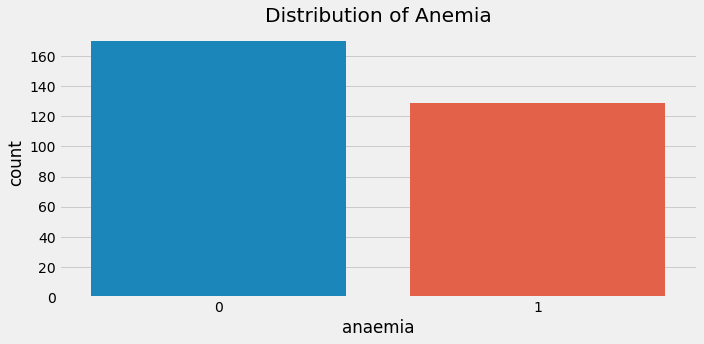

In [17]:
plt.figure(figsize = (10,5))
sns.countplot(x = dtc['anaemia'])
plt.title("Distribution of Anemia")
plt.tight_layout()
plt.show()

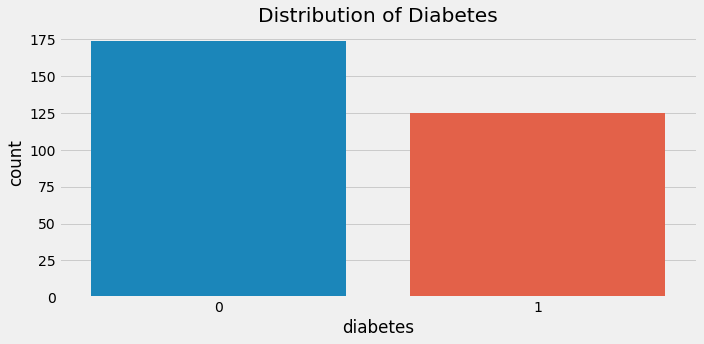

In [18]:
plt.figure(figsize = (10,5))
sns.countplot(x = dtc['diabetes'])
plt.title("Distribution of Diabetes")
plt.tight_layout()
plt.show()

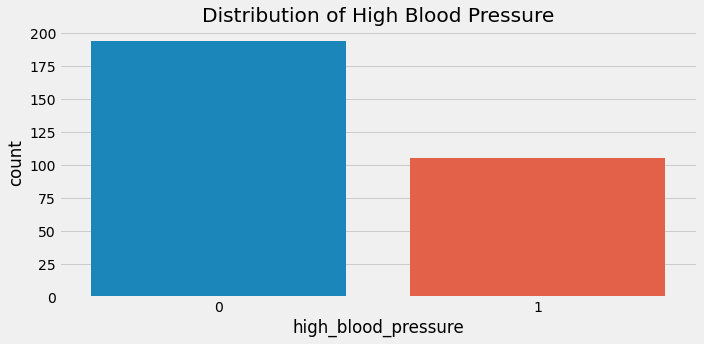

In [19]:
plt.figure(figsize = (10,5))
sns.countplot(x = dtc['high_blood_pressure'])
plt.title("Distribution of High Blood Pressure")
plt.tight_layout()
plt.show()

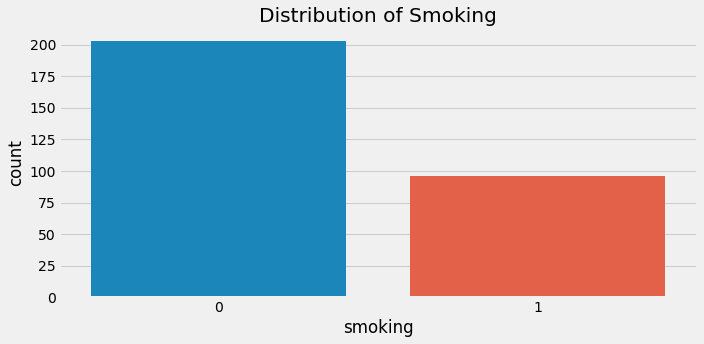

In [20]:
plt.figure(figsize = (10,5))
sns.countplot(x = dtc['smoking'])
plt.title("Distribution of Smoking")
plt.tight_layout()
plt.show()

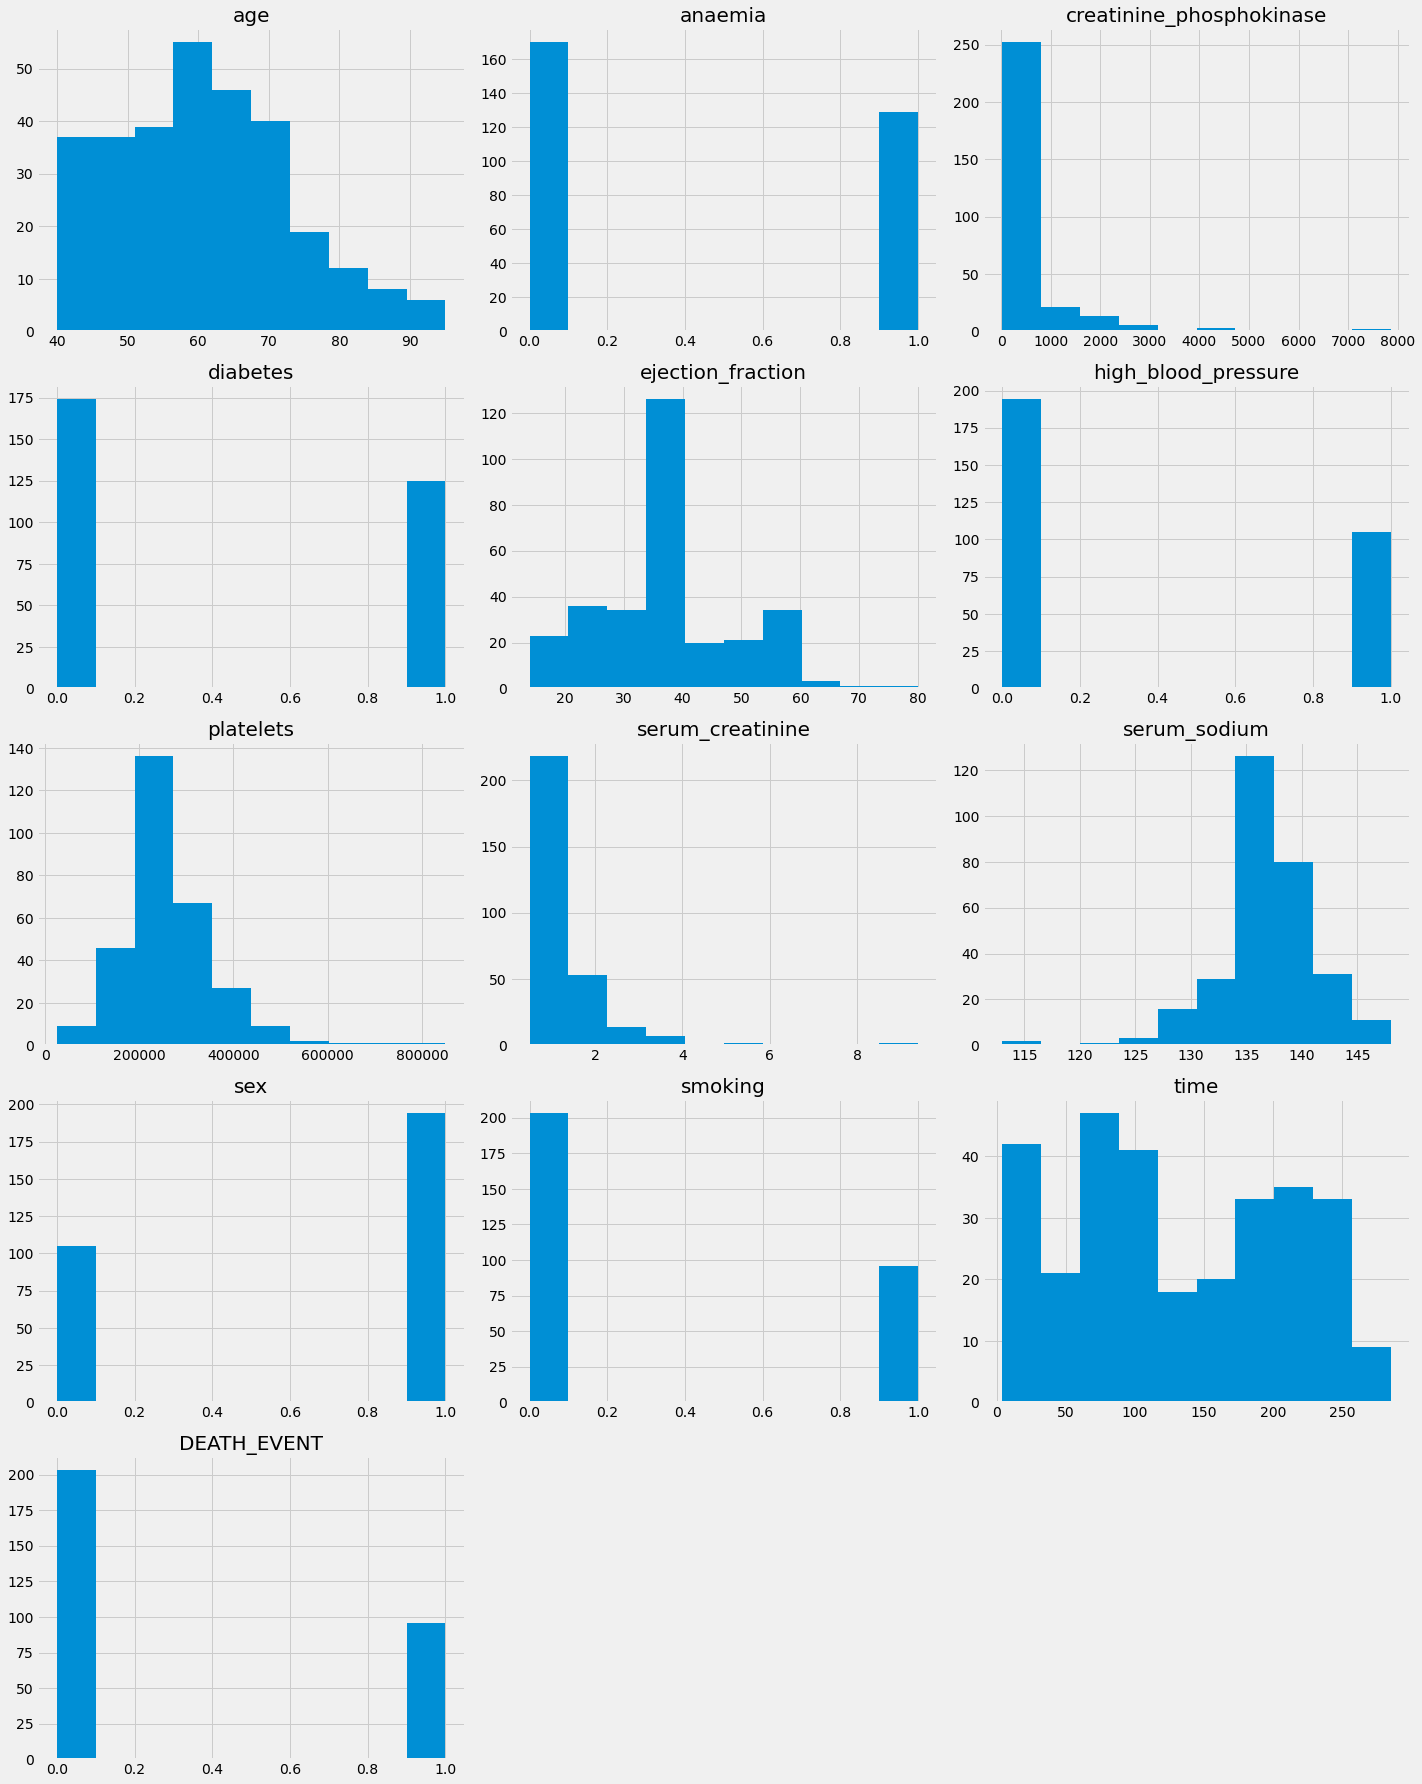

In [21]:
cols = list(dtc.columns)

plt.figure(figsize = (20, 25))
for i in range(len(cols)):
    plt.subplot(len(cols)//3+1, 3, i + 1)
    plt.hist(dtc[cols[i]])
    plt.title(cols[i], fontsize = 20)
    
plt.tight_layout()
plt.show()

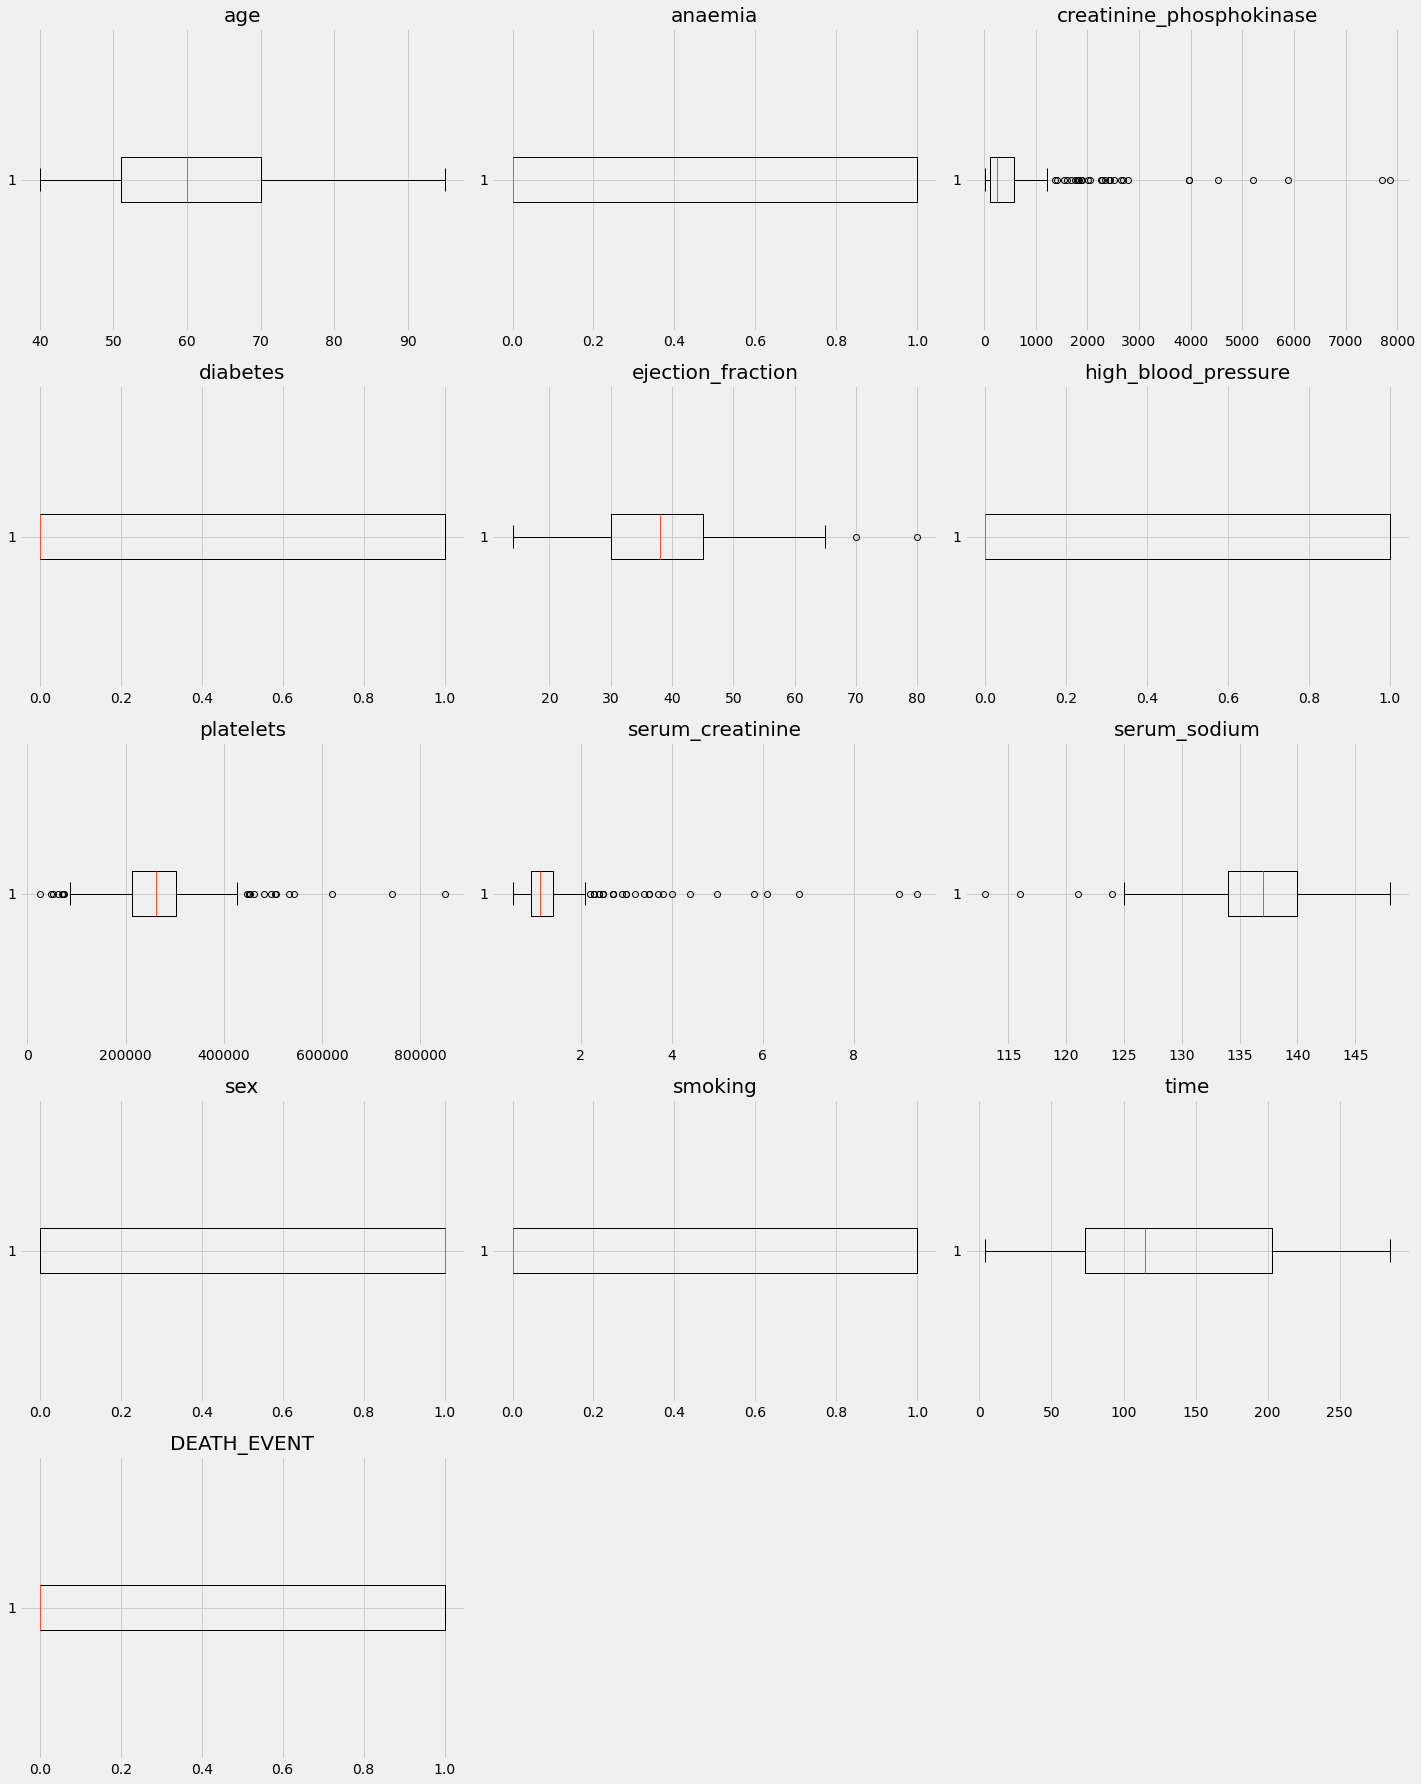

In [22]:
plt.figure(figsize = (20, 25))
for i in range(len(cols)):
    plt.subplot(len(cols)//3+1, 3, i + 1)
    plt.boxplot(dtc[cols[i]], vert=False)
    plt.title(cols[i], fontsize = 20)
    
plt.tight_layout()
plt.show()

**Dari visualisasi data diatas dapat disimpulkan jika data tersebut merupakan Data Skewness**

### **Multivariate**

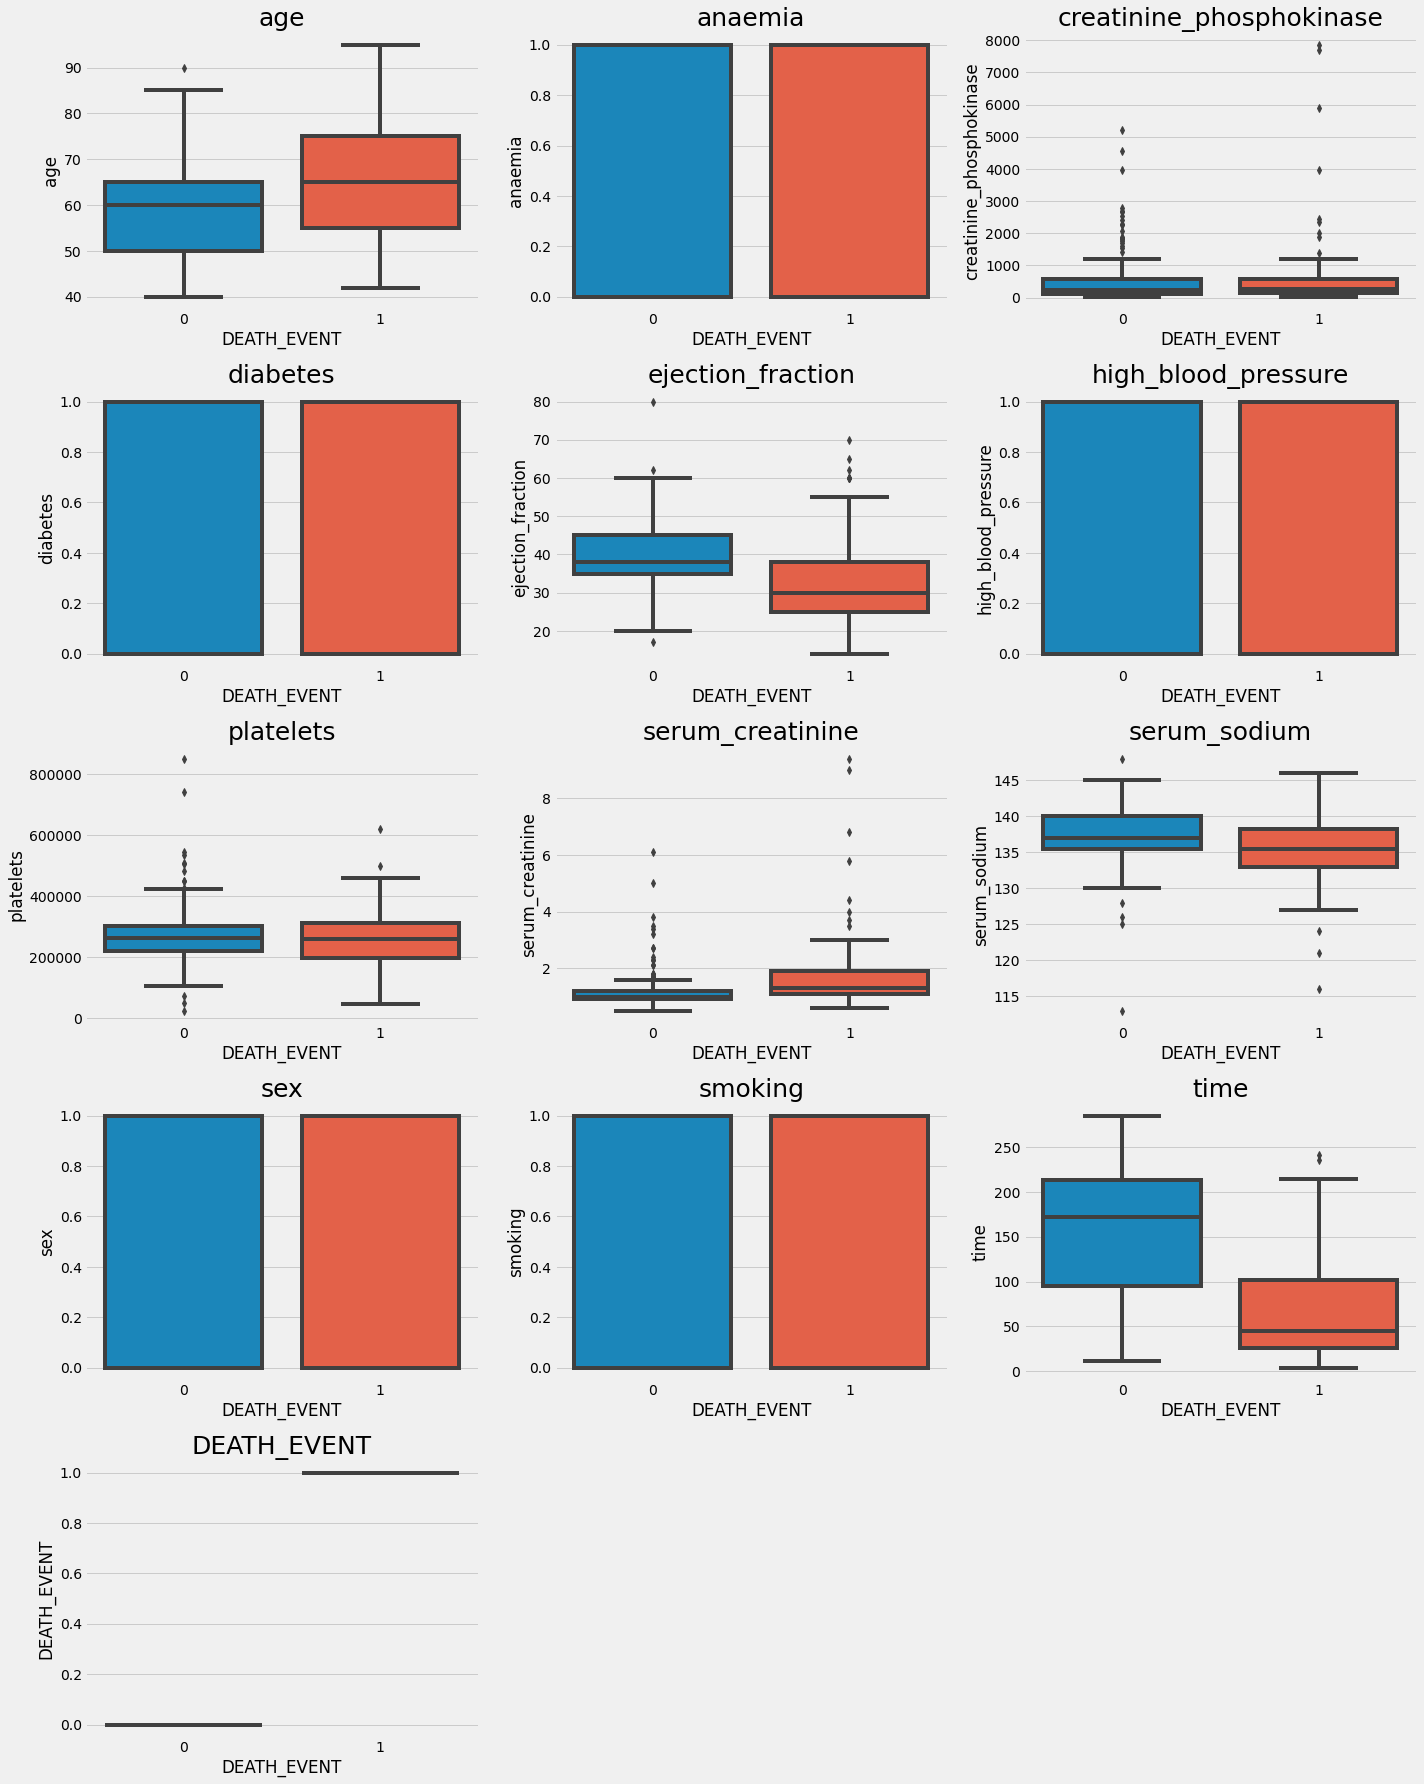

In [23]:
plt.figure(figsize = (20, 25))
for i in range(len(cols)):
    plt.subplot(len(cols)//3+1, 3, i + 1)
    sns.boxplot(y = dtc[cols[i]], x = dtc['DEATH_EVENT'])
    plt.title(cols[i], fontsize = 25)
    
plt.tight_layout()
plt.show()

**Sebagian besar distribusi setiap kolom (fitur) ke target serupa.**

### **Target Variables**

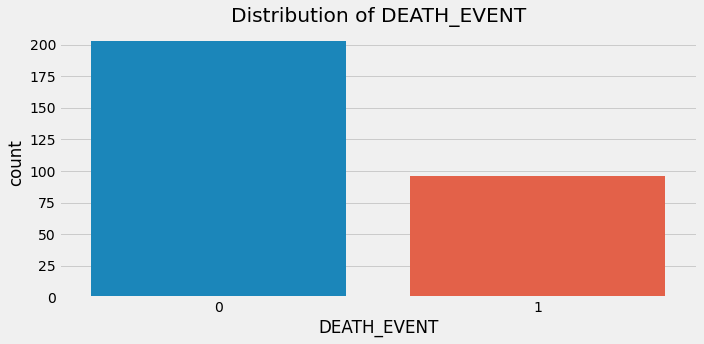

In [24]:
plt.figure(figsize = (10,5))
sns.countplot(x = dtc['DEATH_EVENT'])
plt.title("Distribution of DEATH_EVENT")
plt.tight_layout()
plt.show()

**Nilai 0 merupakan Tidak, jadi dataset ini memiliki tingkat kematian yang rendah**

### **Korelasi Matrix**

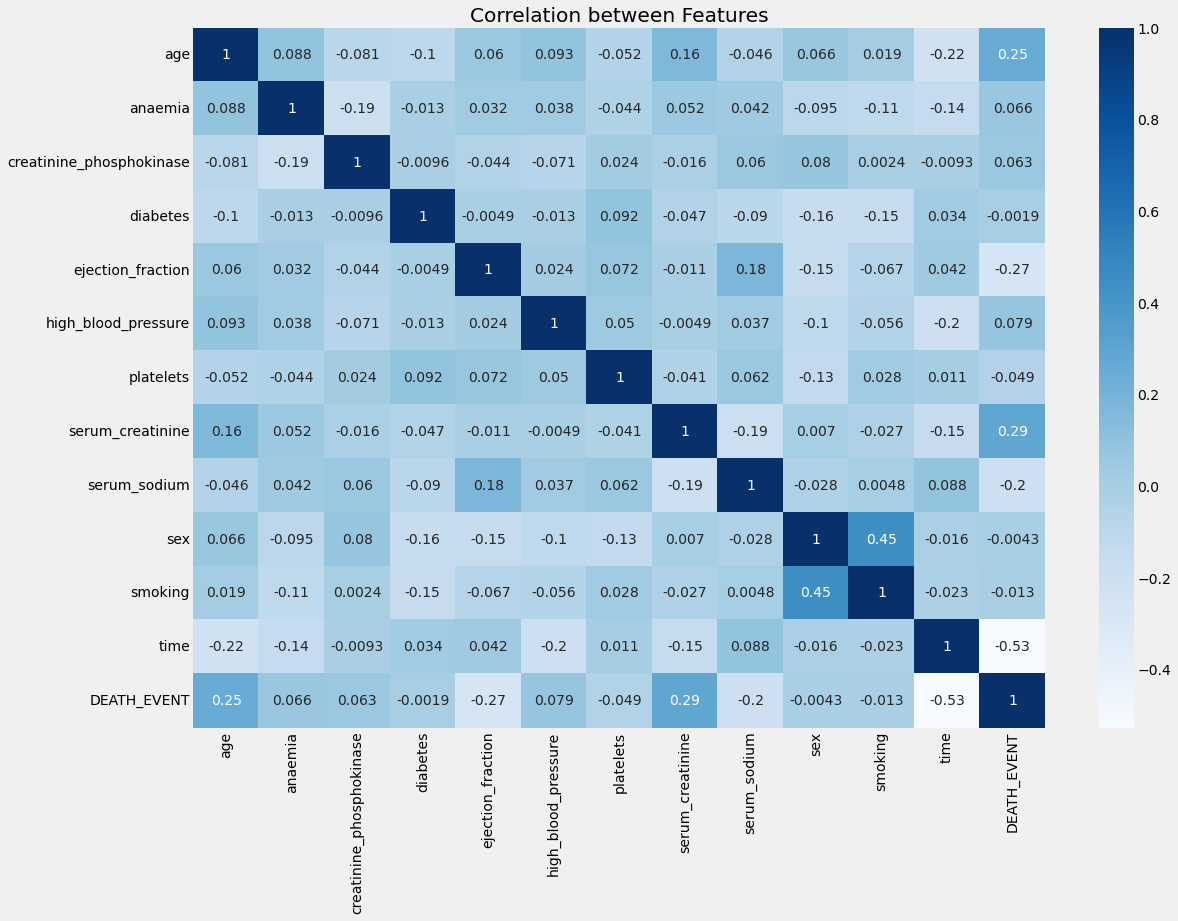

In [25]:
corr = dtc[cols].corr(method = 'pearson')
plt.figure(figsize = (17, 12))
sns.heatmap(corr, cmap='Blues', annot=True)
plt.title("Correlation between Features")
plt.show()

**Fitur korelasi antara satu sama lain hanya memiliki nilai max 0,45. Jadi, kita dapat berasumsi bahwa fitur-fitur ini independen.**

## **STEP 7 : DATA PREPROCESSING**

### **Features selection**

**X didefiniskan sebagai Fitur yang menggunakan semua kolom kecuali kolom "DEATH_EVENT".**

**y merupakan target, yang dimana targetnya sendiri adalah kolom "DEATH_EVENT".**

In [26]:
X = dtc.drop(columns = ["DEATH_EVENT"])
y = dtc["DEATH_EVENT"]

### **Data Split**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 77)

In [28]:
X_train.shape, y_train.shape

((209, 12), (209,))

In [29]:
X_test.shape, y_test.shape

((90, 12), (90,))

### **Data scaling**

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
X_train_trf = scaler.transform(X_train)
X_test_trf = scaler.transform(X_test)

##**STEP 8 : DEFINE MODEL 1 (RANDOM FOREST)**

### **Model Training**

**Melatih model dan menghitung waktunya.**

In [32]:
model_rf = RandomForestClassifier(n_estimators=100)
%time model_rf.fit(X_train_trf, y_train)

CPU times: user 212 ms, sys: 4.96 ms, total: 217 ms
Wall time: 218 ms


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### **Model Evaluation**

**Membandingkan akurasi dari Train-set dan Test-set**

In [33]:
#Train-set
model_rf_pred = model_rf.predict(X_train_trf)
%time print('Train-set accuracy score: ', accuracy_score(y_train, model_rf_pred))

Train-set accuracy score:  1.0
CPU times: user 1.67 ms, sys: 90 µs, total: 1.76 ms
Wall time: 1.5 ms


In [34]:
#Test-set
model_rf_pred_test = model_rf.predict(X_test_trf)
%time print('Test-set accuracy score: ', accuracy_score(y_test, model_rf_pred_test))

Test-set accuracy score:  0.8666666666666667
CPU times: user 754 µs, sys: 0 ns, total: 754 µs
Wall time: 668 µs


**Classification Report**

In [35]:
#Train-set
%time print(classification_report(y_train, model_rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00        66

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209

CPU times: user 13.6 ms, sys: 2.08 ms, total: 15.6 ms
Wall time: 21.6 ms


In [36]:
#Test-set
%time print(classification_report(y_test, model_rf_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        60
           1       0.88      0.70      0.78        30

    accuracy                           0.87        90
   macro avg       0.87      0.82      0.84        90
weighted avg       0.87      0.87      0.86        90

CPU times: user 10.4 ms, sys: 1.04 ms, total: 11.4 ms
Wall time: 28.3 ms


**Confusion Matrix**

In [37]:
#Train-set
%time print(confusion_matrix(y_train, model_rf_pred))

[[143   0]
 [  0  66]]
CPU times: user 3.62 ms, sys: 81 µs, total: 3.71 ms
Wall time: 7.91 ms


In [38]:
#Test-set
%time print(confusion_matrix(y_test, model_rf_pred_test))

[[57  3]
 [ 9 21]]
CPU times: user 2.41 ms, sys: 1.07 ms, total: 3.47 ms
Wall time: 2.85 ms


**ROC AUC Score**

In [39]:
#Train-set
%time print(roc_auc_score(y_train, model_rf_pred))

1.0
CPU times: user 6.23 ms, sys: 0 ns, total: 6.23 ms
Wall time: 6.93 ms


In [40]:
#Test-set
%time print(roc_auc_score(y_test, model_rf_pred_test))

0.825
CPU times: user 1.68 ms, sys: 1.98 ms, total: 3.66 ms
Wall time: 3.38 ms


### **Cross Validation RandomForest**

In [41]:
%time accuracy_cv_rf = cross_val_score(model_rf, X, y, cv=10)
print(accuracy_cv_rf)

#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:", accuracy_cv_rf.mean() * 100)

CPU times: user 2.02 s, sys: 17.2 ms, total: 2.03 s
Wall time: 2.04 s
[0.33333333 0.86666667 0.86666667 0.9        0.9        0.9
 0.7        0.76666667 0.73333333 0.68965517]
Accuracy of Model with Cross Validation is: 76.5632183908046


In [42]:
%time accuracy_cv_rf = cross_val_score(model_rf, X_train_trf, y_train, cv=10)
print(accuracy_cv_rf)

#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:", accuracy_cv_rf.mean() * 100)

CPU times: user 1.89 s, sys: 33.9 ms, total: 1.92 s
Wall time: 1.93 s
[0.76190476 0.9047619  0.85714286 0.85714286 0.76190476 0.71428571
 0.80952381 0.80952381 0.80952381 0.8       ]
Accuracy of Model with Cross Validation is: 80.85714285714285


**Untuk Random Forest mendapatkan nilai akurasi :**
* Accuracy of Model with Cross Validation is: 76.56
* Accuracy of Model with Cross Validation is: 80.85

### **Model Inference**

**Menggunakan model Random forest yang telah dibuat untuk memprediksi data baru.**

In [43]:
prediction_results = []
tstart = time.time()

#predict x test
model_pred = model_rf.predict(X_test_trf)

# append result to list
prediction_results.append(model_pred)

tfinish = time.time()
time_elapsed = round((tfinish - tstart)*1000, 2)

print('Elapsed prediction time: ',time_elapsed,' ms')

Elapsed prediction time:  27.95  ms


In [44]:
# predict result to dataframe
prediction_result_rf = pd.DataFrame({
    "Actual DEATH_EVENT":y_test,
    "Prediction":prediction_results[0]
})
prediction_result_rf.head()

,Actual DEATH_EVENT,Prediction
162,0,0
177,0,0
87,0,0
108,0,0
73,0,0


### **Random Forest Hyperparameter Tuning**

In [45]:
# Print score function

def print_score(model, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = model.predict(X_train)
        model_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n=========================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{model_report}")
        print("_________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = model.predict(X_test)
        model_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n=============================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_____________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{model_report}")
        print("_____________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [46]:
tstart = time.time() #for calculating processing time

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

model_rf = RandomForestClassifier(random_state=77)

model_rf_rsCV = RandomizedSearchCV(estimator=model_rf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=77, n_jobs=-1)

model_rf_rsCV.fit(X_train_trf, y_train)
rf_best_params = model_rf_rsCV.best_params_
print(f"Best parameters: {rf_best_params})")
tfinish = time.time()

time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')

model_rf = RandomForestClassifier(**rf_best_params)
model_rf.fit(X_train_trf, y_train)

print_score(model_rf, X_train_trf, y_train, X_test_trf, y_test, train=True)
print_score(model_rf, X_train_trf, y_train, X_test_trf, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.9min finished


Best parameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False})
Elapsed prediction time:  473515.99  ms
Train Result:
Accuracy Score: 100.00%
_________________________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    143.0  66.0       1.0      209.0         209.0
_________________________________________________________
Confusion Matrix: 
 [[143   0]
 [  0  66]]

Test Result:
Accuracy Score: 87.78%
_____________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.876923   0.880000  0.877778   0.878462      0.877949
recall      0.950000   0.733333  0.877778  

### **Model Analysis**
 
**Best parameters :**
* n_estimators : 1000 
* min_samples_split : 5 
* min_samples_leaf : 2
* max_features : sqrt
* max_depth : None
* bootstrap : False

**Elapsed prediction time :** 473515.99ms

**Accuracy Score :**
* Train Accuracy Score : 100.00%
* Test Accuracy Score  : 87.78%

In [47]:
tstart = time.time() #for calculating processing time

n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

model_rf = RandomForestClassifier(random_state=77)

model_rf_gridCV = GridSearchCV(model_rf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


model_rf_gridCV.fit(X_train_trf, y_train)
best_params = model_rf_gridCV.best_params_
print(f"Best parameters: {best_params}")
tfinish = time.time()

time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')

model_rf = RandomForestClassifier(**best_params)
model_rf.fit(X_train_trf, y_train)

print_score(model_rf, X_train_trf, y_train, X_test_trf, y_test, train=True)
print_score(model_rf, X_train_trf, y_train, X_test_trf, y_test, train=False)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed: 40.1min finished


Best parameters: {'bootstrap': False, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Elapsed prediction time:  2408196.09  ms
Train Result:
Accuracy Score: 89.95%
_________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.881250   0.959184  0.899522    0.920217      0.905861
recall       0.986014   0.712121  0.899522    0.849068      0.899522
f1-score     0.930693   0.817391  0.899522    0.874042      0.894914
support    143.000000  66.000000  0.899522  209.000000    209.000000
_________________________________________________________
Confusion Matrix: 
 [[141   2]
 [ 19  47]]

Test Result:
Accuracy Score: 88.89%
_____________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.867647   0.954545  0.888889   0.911096      0.

### **Model Analysis** 

**Best parameters:**
* n_estimators : 500
* min_samples_split : 5
* min_samples_leaf : 2
* max_features : auto
* max_depth : 3 
* bootstrap : False

**Elapsed prediction time :** 2408196.09ms

**Accuracy Score :**
* Train Accuracy Score : 89.95%
* Test Accuracy Score  : 88.89%

##**STEP 9 : DEFINE MODEL 2 (GRADIENT BOOSTING)**

### **Model Training**

**Melatih model dengan Gradient Boosting dan hitung waktunya**

In [48]:
model_grad_boost = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=77)
%time model_grad_boost.fit(X_train_trf, y_train)

CPU times: user 204 ms, sys: 1.12 ms, total: 205 ms
Wall time: 207 ms


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=77, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### **Model Evaluation**

In [49]:
# Evaluate function

def evaluate(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("TRAINIG RESULTS: \n=================")
    model_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"ROC_AUC SCORE: {roc_auc_score(y_train, y_train_pred)}\n")
    print(f"CLASSIFICATION REPORT:\n{model_report}\n")

    print("TESTING RESULTS: \n=================")
    model_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"ROC_AUC SCORE: {roc_auc_score(y_test, y_test_pred)}\n")
    print(f"CLASSIFICATION REPORT:\n{model_report}")

### **Model Analysis :** 

In [50]:
%time evaluate(model_grad_boost, X_train_trf, y_train, X_test_trf, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[143   0]
 [  0  66]]
ACCURACY SCORE: 1.0000
ROC_AUC SCORE: 1.0

CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    143.0  66.0       1.0      209.0         209.0

TESTING RESULTS: 
CONFUSION MATRIX:
[[56  4]
 [ 8 22]]
ACCURACY SCORE: 0.8667
ROC_AUC SCORE: 0.8333333333333334

CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.875000   0.846154  0.866667   0.860577      0.865385
recall      0.933333   0.733333  0.866667   0.833333      0.866667
f1-score    0.903226   0.785714  0.866667   0.844470      0.864055
support    60.000000  30.000000  0.866667  90.000000     90.000000
CPU times: user 64.8 ms, sys: 7.51 ms, total: 72.3 ms
Wall time: 64.2 ms


### **Cross Validation Gradient Boosting**

In [51]:
%time accuracy_cv_gb = cross_val_score(model_grad_boost, X, y, cv=10)
print(accuracy_cv_gb)

#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:", accuracy_cv_gb.mean() * 100)

CPU times: user 2.32 s, sys: 9.6 ms, total: 2.33 s
Wall time: 2.33 s
[0.33333333 0.8        0.83333333 0.73333333 0.73333333 0.8
 0.56666667 0.7        0.73333333 0.68965517]
Accuracy of Model with Cross Validation is: 69.22988505747126


In [52]:
%time accuracy_cv_gb = cross_val_score(model_grad_boost, X_train_trf, y_train, cv=10)
print(accuracy_cv_gb)

#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:", accuracy_cv_gb.mean() * 100)

CPU times: user 2.04 s, sys: 7.51 ms, total: 2.05 s
Wall time: 2.05 s
[0.80952381 0.85714286 0.9047619  0.80952381 0.80952381 0.85714286
 0.80952381 0.76190476 0.80952381 0.85      ]
Accuracy of Model with Cross Validation is: 82.78571428571428


### **Model Inference**

**Menggunakan model yang sudah dibuat untuk memprediksi data baru.**

In [53]:
prediction_result = []

tstart = time.time()
model_pred = model_grad_boost.predict(X_test_trf)

prediction_result.append(model_pred)
tfinish = time.time()
time_elapsed = round((tfinish - tstart)*1000,2)

print('Elapsed prediction time: ', time_elapsed, 'ms')

Elapsed prediction time:  1.35 ms


In [54]:
#insert predict result to dataframe
prediction_result_gb = pd.DataFrame({
    "Actual Death_event":y_test,
    "Prediction with GB":prediction_result[0]
})
prediction_result_gb.head()

,Actual Death_event,Prediction with GB
162,0,0
177,0,0
87,0,0
108,0,0
73,0,0


### **Gradient Boosting Hyperparameter Tuning**

In [55]:
tstart = time.time() #for calculating processing time

loss = ['deviance','exponential']
learning_rate = [0.1, 0.4, 0.7]
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(3, 30, num=10)]
#max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


random_grid = {'loss': loss, 'learning_rate': learning_rate,
               'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

model_gb = GradientBoostingClassifier(random_state=77)

model_gb_rsCV = RandomizedSearchCV(estimator=model_gb, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=77, n_jobs=-1)

model_gb_rsCV.fit(X_train_trf, y_train)
best_params = model_gb_rsCV.best_params_
print(f"Best parameters: {best_params}")
tfinish = time.time()

time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')

model_gb = GradientBoostingClassifier(**best_params)
model_gb.fit(X_train_trf, y_train)

%time evaluate(model_gb, X_train_trf, y_train, X_test_trf, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


Best parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.7}
Elapsed prediction time:  143943.18  ms
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[143   0]
 [  0  66]]
ACCURACY SCORE: 1.0000
ROC_AUC SCORE: 1.0

CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    143.0  66.0       1.0      209.0         209.0

TESTING RESULTS: 
CONFUSION MATRIX:
[[55  5]
 [ 6 24]]
ACCURACY SCORE: 0.8778
ROC_AUC SCORE: 0.8583333333333333

CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.901639   0.827586  0.877778   0.864613      0.876955
recall      0.916667   0.800000  0.877778   0.858333      0.877778
f1-score    0.909091   0.813559  0.

## **STEP 10 : KESIMPULAN**

### **Overal Analysis**
Dari kedua model ini, akurasinya tidak jauh berbeda, bahkan setelah mengoptimalkan parameter menggunakan "Randomized Search Cross Validation" dan "GridSearchCV". Dari hasil "Confusion Matrix", keduanya mendapatkan "False Negative" yang tinggi (yang membuat nilai recall rendah). Dan juga. "Skor F1" yang diperoleh keduanya tidak terlalu bagus bahkan setelah parameter dioptimalkan. Karena dataset yang digunakan terkait secara medis, saya akan memilih model yang menghasilkan nilai recall yang tinggi ("False Negative" rendah) untuk memprediksi kemungkinan pasien gagal jantung. Karena lebih baik memprediksi pasien akan mengalami gagal jantung daripada sebaliknya. Sehingga pasien dapat dipantau dan dirawat secara intensif. Oleh karena itu, saya menyimpulkan bahwa Random Forest cocok untuk digunakan dalam dataset ini.